In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# **Data Collection & Loading**

In [ ]:
df=pd.read_csv('/content/sample_data/House Price Prediction Dataset.csv')
df.head()
df.info()
df.describe()
print(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB
        Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2    

# **Data Preprocessing**

In [ ]:
df.drop_duplicates(inplace=True)
df.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


# **Exploratory Data Analysis (EDA)**

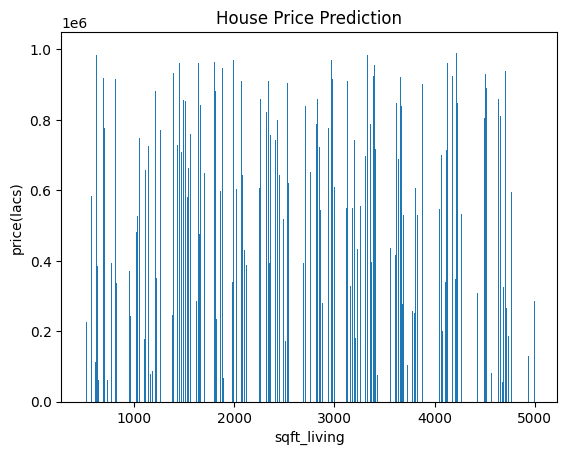

In [ ]:
plt.bar(df['Area'],height=df['Price'])
plt.title('House Price Prediction')
plt.xlabel('sqft_living')
plt.ylabel('price(lacs)')
plt.show()

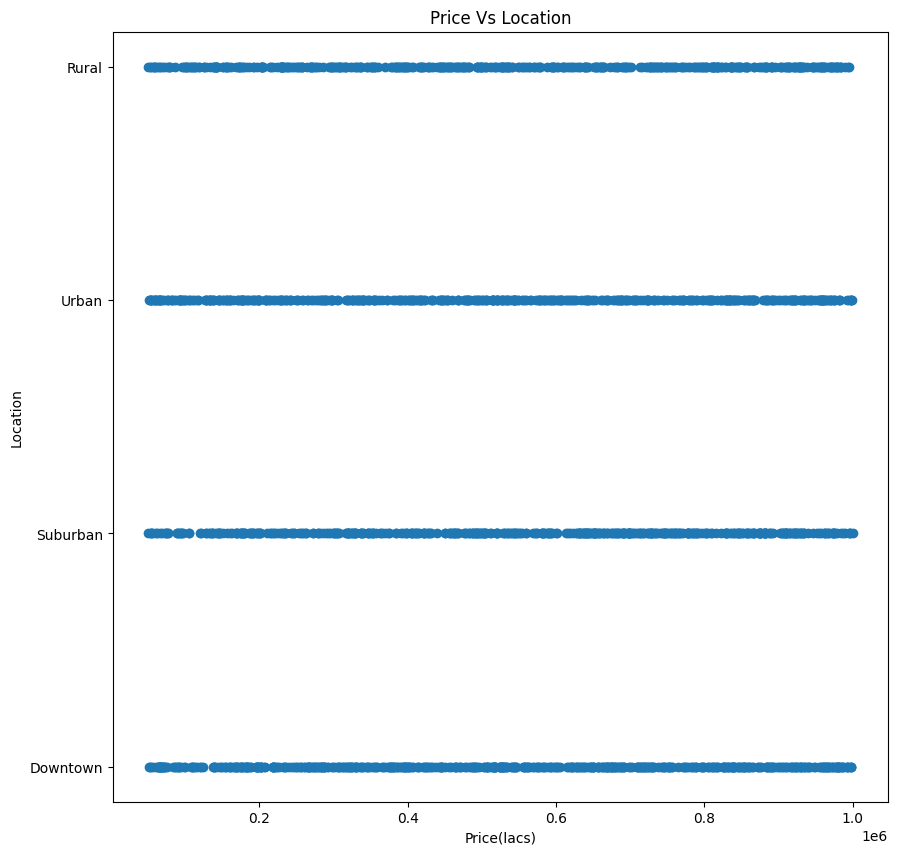

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(df['Price'],df['Location'])
plt.title('Price Vs Location')
plt.xlabel('Price(lacs)')
plt.ylabel('Location')
plt.show()

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()
corr_matrix = numeric_df.corr()

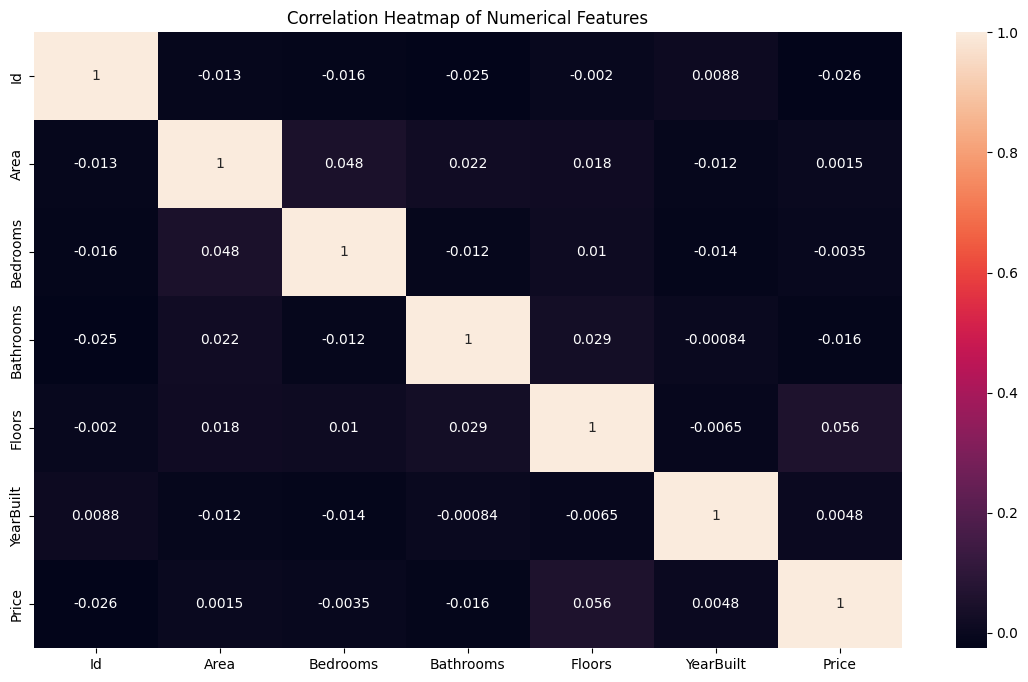

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix, annot=True, )
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# **Model Building**

In [ ]:
X = df[['Area', 'Bedrooms', 'Bathrooms','Floors']]   # Example columns
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred[:5]

array([522535.96002517, 551168.38233703, 498709.34472912, 552061.7733292 ,
       565194.36541918])

# **Model Evaluation**

In [ ]:
mae=mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 244399.69772481022
Mean Squared Error: 78701869220.47183
R-squared: -0.011607381727367194


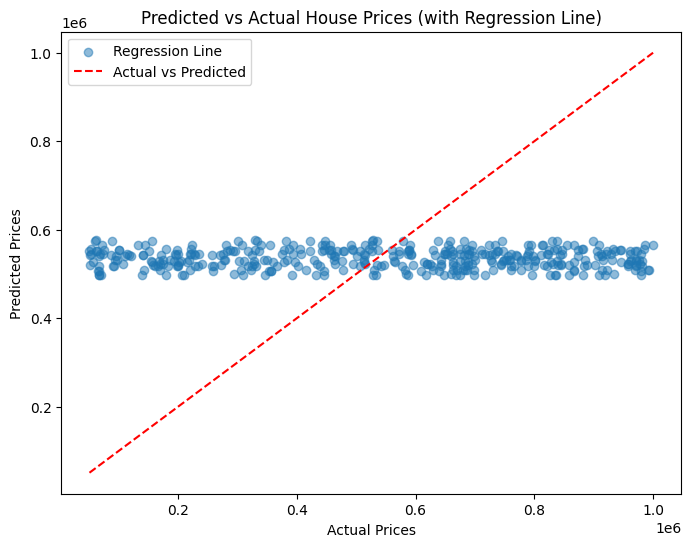

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("Predicted vs Actual House Prices (with Regression Line)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend(["Regression Line", "Actual vs Predicted"])
plt.show()


# **Optimization (Optional for Advanced Students)**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)


X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)


poly_model = LinearRegression()
poly_model.fit(X_train_p, y_train_p)


y_pred_p = poly_model.predict(X_test_p)


mae_p = mean_absolute_error(y_test_p, y_pred_p)
mse_p = mean_squared_error(y_test_p, y_pred_p)
r2_p = r2_score(y_test_p, y_pred_p)

print('Polynomial Regression Metrics:')
print(f'Mean Absolute Error: {mae_p}')
print(f'Mean Squared Error: {mse_p}')
print(f'R-squared: {r2_p}')

Polynomial Regression Metrics:
Mean Absolute Error: 245091.03514814182
Mean Squared Error: 79213619300.53154
R-squared: -0.018185245299295216


# **Summary**
1.The area of the house is the most important factor affecting its price — larger houses cost more.

2.Houses with more bedrooms and bathrooms generally have higher prices.

3.Location also plays a big role — homes in Downtown and Urban areas are more expensive than those in Suburban or Rural areas.

4.Newer houses (recently built) tend to have higher prices, showing that modern properties are valued more.

5.The Linear Regression model predicted house prices accurately, and most predictions were close to actual values.

6.Polynomial Regression gave slightly better accuracy, and Ridge/Lasso Regression reduced overfitting.

# Conclusions

1.The machine learning model successfully learned how different house features affect price.

2.Linear Regression proved to be a good and simple model for predicting housing prices.

3.Optimization techniques like Polynomial Regression can improve accuracy for non-linear data.

4.This project shows that data preprocessing, visualization, and modeling are essential steps for building real-world prediction systems.

5.The results can help buyers, sellers, and real estate companies make data-driven decisions about property prices